In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

# Polynomials with numpy

In numpy there is a module useful for dealing with polynomial functions and fitting polynomials to data. 


\begin{equation}
p(x)=\sum_{i=0}^{n} a_i \,x^{(n-i)}
\end{equation}

e.g. a parabola (n=2) is $p(x)=a_0x^2+a_1x+a_2$

To this end you just need 2 functions defined in numpy:

```
numpy.polyval(p, x)

        Evaluate a polynomial at specific values.

        If p is of length N, this function returns the value:
            p[0]*x**(N-1) + p[1]*x**(N-2) + ... + p[N-2]*x + p[N-1]


     numpy.polyfit(x, y, deg)

        Least squares polynomial fit.
        Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y). Returns a vector of coefficients p that minimises the squared error.
        
 ```

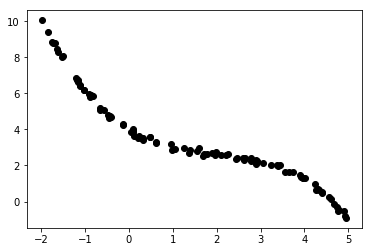

In [2]:
# generate some random numbers for x

npts=100
x=np.random.uniform(-2,5,npts)

y= -0.1*x**3+0.6*x**2 - 1.5*x +4
# add some random noise
y+=np.random.normal(0,.1,npts)

fig,ax=plt.subplots()
ax.plot(x,y,'ok');

In [3]:
# fit x,y with a cubic function

p=np.polyfit(x,y,3) # deg=3
print (p)

# generate some points at which you want to evaluate the fit (to plot the best-fit model)
xfit=np.linspace(x.min(),x.max(),100)
# get the values of the bestf-fit model at x
yfit=np.polyval(p,xfit)


[-0.10152098  0.60618164 -1.49109263  3.98177807]


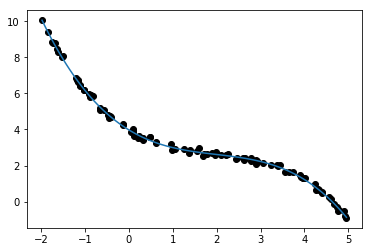

In [4]:
# overplot on the previously defined axis
ax.plot(xfit,yfit)
fig  # display fig again

## <span style="color:red">Exercise:</span> Carbon Dioxide

The values of the atmospheric CO2 levels measured at Mauna Loa Observatory, Hawaii, are stored in the file `data/co2.txt`.
The second column are CO2 levels in part per million (ppm); the third one are the values with the average seasonal cycle removed. 

Credit: NOAA. https://climate.nasa.gov/vital-signs/carbon-dioxide/

* Create an `astropy Table` reading the data from the file
* plot the data (seasonal cycle removed)
* make a polynomial fit to the data and plot the result

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

tab=ascii.read("data/co2.txt")
tab

date,co2,trend
float64,float64,float64
1958.208,315.71,314.62
1958.292,317.45,315.29
1958.375,317.5,314.71
1958.458,317.1,314.85
1958.542,315.86,314.98
1958.625,314.93,315.94
1958.708,313.2,315.91
1958.792,312.66,315.61
1958.875,313.33,315.31


you should produce a plot like this one:
<img src="solutions/co.png">


In [6]:
# your solution

date=tab["date"]
co2=tab["co2"]
co2t=tab["trend"]

# ...


In [7]:
# %load solutions/co.py

## <span style="color:red">Exercise:</span> Global Temperature
The file `data/647_Global_Temperature_Data_File.txt` is a list of
the variations in the global surface temperature for every year.

The second column in the file is the annual mean;
the third column is the five-year average variation. 

Credit: NASA/GISS. https://climate.nasa.gov/vital-signs/global-temperature/



* Create an `astropy Table` reading the data from the file
* plot the data
* select 5-year average values after 1970
* make a fit and plot the result
* how much does the global temperature increase every year?

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

tab=ascii.read("data/647_Global_Temperature_Data_File.txt")
tab[:3]


year,dT,dT_5
int64,float64,float64
1880,-0.2,-0.13
1881,-0.12,-0.16
1882,-0.1,-0.19


you should produce a plot like this one:
<img src="solutions/global_temperature.png">


In [9]:
# you solution


In [10]:
# %load solutions/global_temperature.py

# The `astropy.modeling` Package

This subpackage provides a framework for representing models and performing model evaluation and fitting. It supports 1D and 2D models and fitting with parameter constraints. It has some predefined models and fitting routines. 

For a list of available models: http://docs.astropy.org/en/stable/modeling/index.html#module-astropy.modeling

It is possible to define new models either from a user-define function or by combining models using arithmetic expressions.

The following examples illustrates a 1D and a 2D case:

* [1D Gaussian](http://docs.astropy.org/en/stable/api/astropy.modeling.functional_models.Gaussian1D.html#astropy.modeling.functional_models.Gaussian1D)
* [2D Sersic profile](http://docs.astropy.org/en/stable/api/astropy.modeling.functional_models.Sersic2D.html#astropy.modeling.functional_models.Sersic2D)

## 1D Gaussian


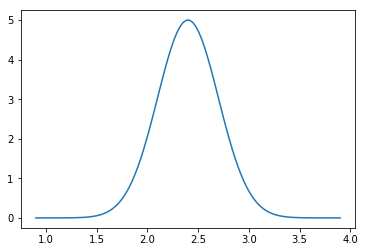

In [11]:
from astropy.modeling import models

# Build a Gaussian
a=5.0   # amplitude
m=2.4   # mean
s=0.3   # standard deviation

f=models.Gaussian1D(amplitude=a,mean=m,stddev=s)
# f is a function!

# points at which you want to evaluate the model
x=np.linspace(m-5*s,m+5*s,100)
# apply f to x
y=f(x)

fig,ax=plt.subplots()
ax.plot(x,y);

## 2D Sersic, create your galaxy

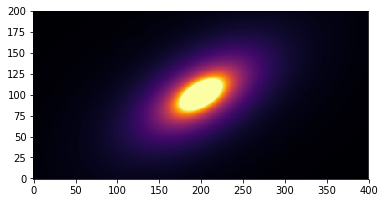

In [12]:
from astropy.modeling import models

f=models.Sersic2D(amplitude=1, r_eff=80, n=2.5, x_0=200, y_0=100, ellip=0.5, theta=np.pi/6)
y, x = np.mgrid[:200, :400]

ima=f(x,y)

fig,ax=plt.subplots()
ax.imshow(ima,origin='lower',vmin=0,vmax=5,cmap=plt.cm.inferno);



# Compound models

A possible way to create new models is by combining existing models using the arithmetic operators `+`, `-`, `*`, `/`, and `**`.

As an example let's create a model that is the sum of a 1D gaussian and a linear relation
    
\begin{equation}
f(x)=A e^{-\frac{(x-x_0)^2}{2\sigma^2}}+p_1\;x+p_0
\end{equation}


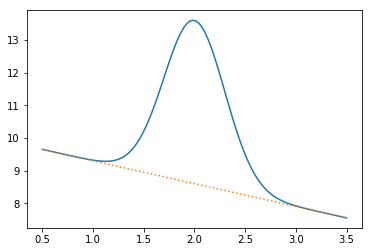

In [13]:
from astropy.modeling import models


# Build a Gaussian
amplitude=5
mean=2
stddev=.3

p1=-0.7  # Slope of the straight line
p0=10  # Intercept of the straight line

f1=models.Gaussian1D(amplitude,mean,stddev)
f2=models.Linear1D(p1,p0)

f=f1+f2
x=np.linspace(mean-5*stddev,mean+5*stddev,100)
y=f(x)
y_line=f2(x)  # evaluate the LinearModel at x to plot the straight line

fig,ax=plt.subplots()
ax.plot(x,y)
ax.plot(x,y_line,':') # plot only the straight line

# Fitting models using astropy

To fit an astropy model to some data you need:

* A model
* An initial guess for the model parameters
* An algorithm to find the best-fit solution starting from your initial guess

The algorithm is called `fitter` in astropy. We will use the [Levenberg-Marquardt algorithm](https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm).

The choice of the initial parameters is critical. In many cases, if the initial parameters are very different from the best-solution, the algorithm
will not converge to the *"correct"* best-fit solution.

Let's generate some random numners to see how it work

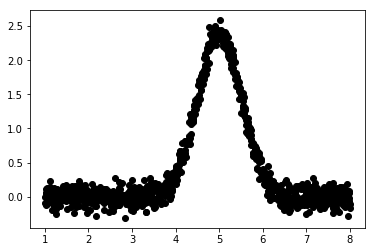

In [14]:
npts=1000
x=np.random.uniform(1,8,npts)

y=2.4*np.exp( -(x-5)**2/(2*.5**2) )
# add some noise
y+=np.random.normal(0,.1,npts)
fig,ax=plt.subplots()
ax.plot(x,y,'ok');

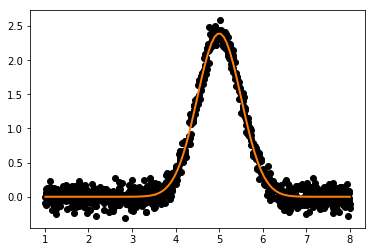

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

# Fit the data using a Gaussian

# define the model with your initial guess for the parameters
# in this case the initial guess is far from the solution,
# but this is a simple case, and the choice is not critical!
f_init = models.Gaussian1D(amplitude=1., mean=0, stddev=1.)

fitter = fitting.LevMarLSQFitter()  # define your fitter

f_fit = fitter(f_init, x, y) # get the best-fit model 

xfit=np.linspace(x.min(),x.max(),100)
yfit=f_fit(xfit)


ax.plot(xfit,yfit,c='#ff7f0e',lw=2)
fig

## A practical example. The spectrum of a star-forming galaxy

`data/sdss_spec-0502-51957-0007.fits`
is the spectrum of a star-forming galaxy at redshift $z=0.14691$
from the [Sloan Digital Sky Survey](http://www.sdss.org/) (SDSS) archive. 

use the `fits.info()` [from `astropy`] convenience function to get info about the fits file

In [16]:
from astropy.io import fits
fitsfile="data/sdss_spec-0502-51957-0007.fits"

fits.info(fitsfile)

Filename: data/sdss_spec-0502-51957-0007.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     143   ()      
  1                1 BinTableHDU     14   3827R x 2C   [E, E]   


get the data and load the BinTable into an astropy Table

In [17]:
from astropy.table import Table

data=fits.getdata(fitsfile,1)
tab=Table(data)
tab[:5]

WAVE,FLUX
float32,float32
3813.29,15.1034
3814.17,16.644
3815.05,15.5065
3815.93,16.5294
3816.81,12.9917


extract the numpy array with the wavelenght and the flux and plot the spectrum

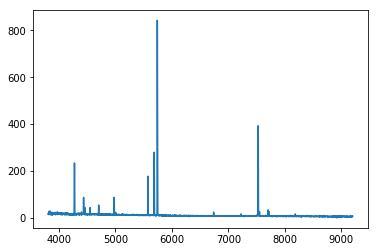

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

w=tab["WAVE"].data
f=tab["FLUX"].data

fig,ax=plt.subplots()
ax.plot(w,f);

In the spectrum there are several emission lines, we want to zoom in the regions where there are these 3 lines:

* $H_\beta$ 4862.68 A
* [OIII]  4960.295 A
* [OIII]  5008.240 A

We want to zoom in the region corresponding to [4800 A, 5050 A] (restframe)

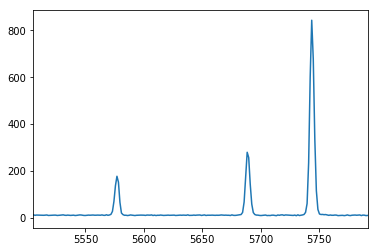

In [19]:
z_sdss=0.14691 # the redshift measured by SDSS

wmin=4800*(z_sdss+1) # redshifted min wavelenght
wmax=5050*(z_sdss+1) # redshifted max

ax.set_xlim(wmin,wmax)  # update the limits of the plot
fig                    # show the figure again

Try to fit the [OIII] line at 5008.240 A (restframe)

The spectral continuum in a "small" interval around the emission line can be approximated by a straight line. In this particular case,
the emission lines can be described by a Gaussian with a sigma that is equal to the spectral resolution of the instrument ($\sim$2 A).

* Find a first guess for the line center. Find the wavelenght corresponding to the max flux in the region of the [OIII]5008 line.
* extract a sub-set of the data by selecting only datapoints within e.g. 20 A from the line center.
* fit a Gasussian (+continuum)

In [20]:
# calculate the wavelenght of the maximum of the reddest line
# this is a good 1st order approximation of the line center
# call this wl
# [ you have to select data in a region around the line]



In [21]:
# select the data for the fit: +- 20 A from out fitst guessed line center
# overplot the selected data in red to check your selection



In [22]:
from astropy.modeling import models,fitting

# define the first guess model
# 1d gauss with center=wl
# + straight line
#
# fit the model to the selected data
# overplot the model



In [23]:
# zoom in to show only the [OIII]5008 line

ax.set_xlim(xx.min(),xx.max())
fig

NameError: name 'xx' is not defined

In [ ]:
# calculate the redshift from the measured value of the line center. 
# The restframe wavelenght of [OIII] is 5008.240 A
# [the value measured by SDSS is 0.14691]



Uncomment the following line to see a possible solution

In [ ]:
# %load solutions/fitOIII.py